In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import geopandas as gpd

# Biodiversity Characterisation Factors

Data Source: https://zenodo.org/records/10114493

In [ ]:
def getCFs():
    """
    Reads the file for characterization factors (CFs) by ecoregion,
    prepares the data, and returns a pandas DataFrame.
    """
    # read the CFs by ecoregion and show some basic info
    filepath = "data/PDF/CF.csv"
    df_CF = pd.read_csv(filepath, delimiter=",", encoding='latin1')
    print(f"Columns: {df_CF.columns}")
    print(f"Number of unique ecoregions: {df_CF['eco_id'].nunique()}")

    #convert eco_id to integer for better matching
    df_CF['eco_id'] = df_CF['eco_id'].astype(int)
    print(df_CF.loc[0])

    return df_CF

# Ecoregions

Data source: https://www.worldwildlife.org/publications/terrestrial-ecoregions-of-the-world

In [4]:
# Load the ecoregions shapefile
df_ecoregions = gpd.read_file("data/ecoregions/official/wwf_terr_ecos.shp")

# Inspect the dataset
#print(ecoregions.head())
print(f"Columns: {df_ecoregions.columns}")
print(f"Number of unique ecoregions: {df_ecoregions['ECO_ID'].nunique()}")
print(f"Total ecoregions: {len(df_ecoregions)}")

#convert ECO_ID to integer for better plotting
df_ecoregions['ECO_ID'] = df_ecoregions['ECO_ID'].astype(int)
'''
# Create a plot with different colors for each ECO_ID
fig, ax = plt.subplots(figsize=(10, 6))


# Plot with colors based on ECO_ID
ecoregions.plot(column='ECO_ID', 
               cmap='tab20',  # Use a colormap with distinct colors
               legend=False,  # Don't show legend (too many categories)
               ax=ax,
               edgecolor='white',
               linewidth=0.1)

plt.title("World Ecoregions - Colored by ECO_ID", fontsize=16)
plt.axis('off')  # Remove axes for cleaner look
plt.tight_layout()
plt.show()'''

Columns: Index(['OBJECTID', 'AREA', 'PERIMETER', 'ECO_NAME', 'REALM', 'BIOME',
       'ECO_NUM', 'ECO_ID', 'ECO_SYM', 'GBL_STAT', 'G200_REGIO', 'G200_NUM',
       'G200_BIOME', 'G200_STAT', 'Shape_Leng', 'Shape_Area', 'area_km2',
       'eco_code', 'PER_area', 'PER_area_1', 'PER_area_2', 'geometry'],
      dtype='object')
Number of unique ecoregions: 827
Total ecoregions: 14458


'\n# Create a plot with different colors for each ECO_ID\nfig, ax = plt.subplots(figsize=(10, 6))\n\n\n# Plot with colors based on ECO_ID\necoregions.plot(column=\'ECO_ID\', \n               cmap=\'tab20\',  # Use a colormap with distinct colors\n               legend=False,  # Don\'t show legend (too many categories)\n               ax=ax,\n               edgecolor=\'white\',\n               linewidth=0.1)\n\nplt.title("World Ecoregions - Colored by ECO_ID", fontsize=16)\nplt.axis(\'off\')  # Remove axes for cleaner look\nplt.tight_layout()\nplt.show()'

# Mining sites polygons - Maus

https://doi.pangaea.de/10.1594/PANGAEA.942325

## Description file

In [ ]:
file_path = "data/mining/maus/Maus-etal_2022_V2.tab"

with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        print(f"Line {i + 1}: {line.strip()}")

Line 1: /* DATA DESCRIPTION:
Line 2: Citation:	Maus, Victor; da Silva, Dieison M; Gutschlhofer, Jakob; da Rosa, Robson; Giljum, Stefan; Gass, Sidnei L B; Luckeneder, Sebastian; Lieber, Mirko; McCallum, Ian (2022): Global-scale mining polygons (Version 2) [dataset]. PANGAEA, https://doi.org/10.1594/PANGAEA.942325
Line 3: Abstract:	This dataset updates the global-scale mining polygons (Version 1) available from https://doi.org/10.1594/PANGAEA.910894. It contains 44,929 polygon features, covering 101,583 km² of land used by the global mining industry, including large-scale and artisanal and small-scale mining. The polygons cover all ground features related to mining, .e.g open cuts, tailing dams, waste rock dumps, water ponds, processing infrastructure, and other land cover types related to the mining activities. The data was derived using a similar methodology as the first version by visual interpretation of satellite images. The study area was limited to a 10 km buffer around the 34,820

## Polygons

Index(['ISO3_CODE', 'COUNTRY_NAME', 'AREA', 'geometry'], dtype='object')
CRS: EPSG:4326


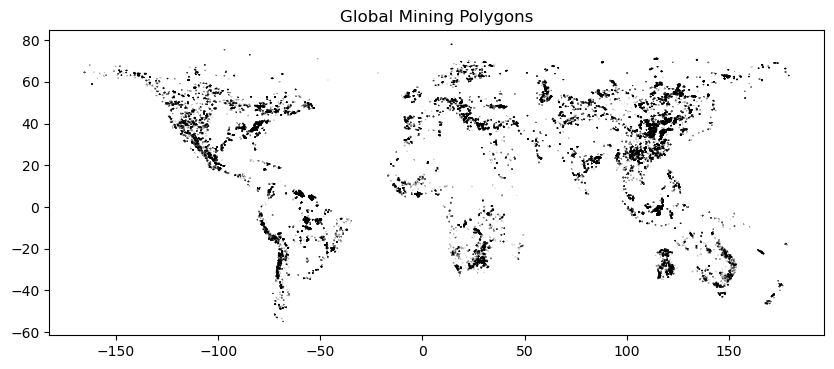

In [ ]:
gpkg_path = "data/mining/maus/global_mining_polygons_v2.gpkg"  
df_mining_polygons = gpd.read_file(gpkg_path)

# Inspect the data
print(df_mining_polygons.columns)

# Check the CRS (Coordinate Reference System)
print("CRS:", df_mining_polygons.crs)
'''
# Plot the mining polygons (if a visualization is desired)
df_mining_polygons.plot(figsize=(10, 6), edgecolor="black", color="orange")
plt.title("Global Mining Polygons")
plt.show()'''

# Mining Data - Jasansky

https://zenodo.org/records/7369478

## Exploring facilities.gpkg

In [ ]:
gpkg_path = "data/mining/jasansky/data/facilities.gpkg"  # Replace with the actual file path
df_facilities = gpd.read_file(gpkg_path)

# Inspect the data
#print(df_facilities.head())
print("Columns:", df_facilities.columns)
print("CRS:", df_facilities.crs)
print(df_facilities.loc[0])

Columns: Index(['facility_id', 'facility_name', 'facility_other_names', 'sub_site_name',
       'sub_site_other_names', 'facility_type', 'primary_commodity',
       'commodities_products', 'facility_equipment', 'production_start',
       'production_end', 'activity_status', 'activity_status_year',
       'surface_area_sq_km', 'concession_area_sq_km', 'country', 'GID_0',
       'GID_1', 'GID_2', 'GID_3', 'GID_4', 'source_id', 'comment', 'geometry'],
      dtype='object')
CRS: EPSG:4326
facility_id                                         COM00001.00
facility_name                                               777
facility_other_names                                       None
sub_site_name                                              None
sub_site_other_names                                       None
facility_type                                              Mine
primary_commodity                                        Copper
commodities_products                 Copper, Zinc, Gold, Silve

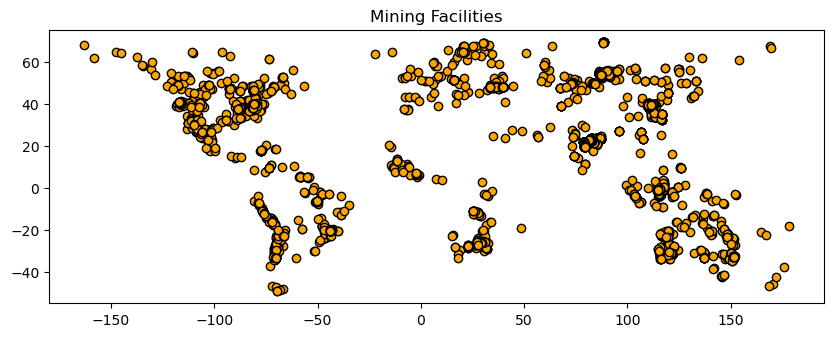

In [ ]:
df_facilities.plot(figsize=(10, 6), color="orange", edgecolor="black")
plt.title("Mining Facilities")
plt.show()

### Additional Attributes

In [ ]:
print("Unique primary commodities:")
print(df_facilities['primary_commodity'].unique())

# Unique commodities/products
print("\nUnique commodities/products:")
print(df_facilities['commodities_products'].unique())

Unique primary commodities:
['Copper' 'Iron' 'Coal' 'Gold' 'Processing' 'Nickel' 'Aluminium' 'Silver'
 'Zinc' 'Other mine' 'Other (poly)-metallic']

Unique commodities/products:
['Copper, Zinc, Gold, Silver' 'Iron ore' 'Sub-bituminous coal'
 'Alumina, Calcined soda'
 'Steel, rebar, steel bar, steel meshes, wire rod, barbed wire' 'Gold'
 'Nickel, Copper, Cobalt, Gold, PGM'
 'Crude Steel, Hot-rolled steel sheet, Steel plate, Chrome plate, Tin plate, Cold-rolled sheet, Structural steel profiles'
 'Thermal coal' 'Coal' 'Copper, Silver, Gold'
 'Copper, Silver, Copper cathode, Gold' 'Bauxite' 'Silver, Gold, Copper'
 'Aluminium' 'Zinc, Lead'
 'Aluminium rod, T-foundry, Molten metal, High purity, Remelt'
 'Aluminium high purity, Remelt' 'Zinc, Silver, Lead, Copper'
 'Bauxite, Alumina' 'Copper, Gold' 'Copper' 'Alumina'
 'Gold, Copper, Silver' 'Platinum, Palladium' 'Nickel, Cobalt' 'Pig iron'
 'Metallurgical coal' 'Copper, Molybdenum, Silver' 'Iron'
 'Aluminium, Aluminium ingots, Aluminium sow i

In [ ]:
# Count facility types
facility_types = df_facilities['facility_type'].value_counts()
print("\nFacility types and counts:")
print(facility_types)


Facility types and counts:
facility_type
Mine                       2066
Smelter                      96
Refinery                     67
Refinery, Smelter            57
Smelter, Refinery            55
Mine, Refinery               33
Region                       13
Company                      10
Mine, Smelter                 7
Mine, Refinery, Smelter       5
Concentrator                  3
Mine, Smelter, Refinery       1
Name: count, dtype: int64


In [ ]:
# Earliest and latest production start dates
print("\nProduction start dates:")
print(df_facilities['production_start'].min(), "to", df_facilities['production_start'].max())

# Count active facilities by year
active_status = df_facilities['activity_status'].value_counts()
print("\nFacility activity status:")
print(active_status)


Production start dates:
1554.0 to 2020.0

Facility activity status:
activity_status
active                  27
inactive                14
Project                  9
in development           5
care and maintenance     4
Exploration              3
Advanced exploration     2
exploration              2
Under construction       1
construction             1
stopped 31.12.2013       1
Name: count, dtype: int64


In [ ]:
len(df_facilities)

2413

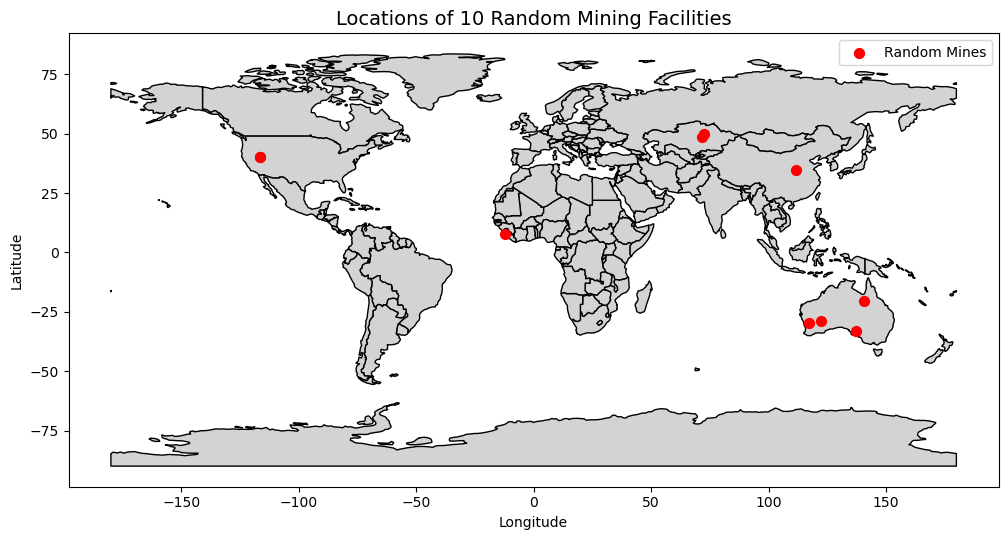


Table of 10 Random Mining Facilities:
╒══════╤═════════════════╤═════════════════════╤════════════════════════════════════╤══════════════════════════╤═══════════════════╤══════════════════════╕
│      │ facility_type   │ primary_commodity   │ commodities_products               │ country                  │ activity_status   │   surface_area_sq_km │
╞══════╪═════════════════╪═════════════════════╪════════════════════════════════════╪══════════════════════════╪═══════════════════╪══════════════════════╡
│  293 │ Mine            │ Gold                │ Gold                               │ United States of America │                   │                  nan │
├──────┼─────────────────┼─────────────────────┼────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────────────┤
│ 1636 │ Mine            │ Copper              │ Copper, Gold                       │ Australia                │                   │                  nan │
├──────┼─────────────────

In [ ]:
from tabulate import tabulate

# Step 1: Select 10 random mines
random_mines = df_facilities.sample(10, random_state=11)  # Set random_state for reproducibility

# Step 2: Plot their location
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the world basemap
world_path = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_path)
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the random mines
random_mines.plot(ax=ax, color='red', markersize=50, label="Random Mines")

# Add plot title and legend
plt.title("Locations of 10 Random Mining Facilities", fontsize=14)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Step 3: Print a nicely formatted table
# Truncate the table to relevant columns
columns_to_display = [
    # "facility_name", 
    "facility_type", 
    "primary_commodity", 
    "commodities_products", 
    "country", 
    # "production_start", 
    # "production_end", 
    'activity_status', 
    'surface_area_sq_km'
]
truncated_table = random_mines[columns_to_display]

# Print the table using tabulate
print("\nTable of 10 Random Mining Facilities:")
print(tabulate(truncated_table, headers='keys', tablefmt='fancy_grid'))

In [ ]:
print("List of all columns in the dataset:")
for column in facilities.columns:
    print(f"- {column}")

List of all columns in the dataset:
- facility_id
- facility_name
- facility_other_names
- sub_site_name
- sub_site_other_names
- facility_type
- primary_commodity
- commodities_products
- facility_equipment
- production_start
- production_end
- activity_status
- activity_status_year
- surface_area_sq_km
- concession_area_sq_km
- country
- GID_0
- GID_1
- GID_2
- GID_3
- GID_4
- source_id
- comment
- geometry


![image.png](attachment:2a4b1779-7924-4702-9c8c-6d9e24ceff0b.png)

## Minerals

In [ ]:
minerals_path = "data/mining/jasansky/data/minerals.csv"
df_minerals = pd.read_csv(minerals_path)
print("Columns:", df_minerals.columns)
print(df_minerals.head(10))

Columns: Index(['id', 'facility_id', 'year', 'type', 'material', 'value_tonnes',
       'overall_grade_ppm', 'amount_sold_tonnes', 'mine_processing',
       'reporting_period', 'source_id', 'comment'],
      dtype='object')
   id  facility_id  year           type material  value_tonnes  \
0   1  COM00001.00  2013      Ore mined   O.bulk       1625532   
1   2  COM00001.00  2013  Ore processed   O.bulk       1625532   
2   3  COM00001.00  2014      Ore mined   O.bulk       1452933   
3   4  COM00001.00  2014  Ore processed   O.bulk       1452933   
4   5  COM00001.00  2015      Ore mined   O.bulk       1235053   
5   6  COM00001.00  2015  Ore processed   O.bulk       1235053   
6   7  COM00001.00  2016      Ore mined   O.bulk       1297829   
7   8  COM00001.00  2016  Ore processed   O.bulk       1297829   
8   9  COM00001.00  2017      Ore mined   O.bulk       1014369   
9  10  COM00001.00  2017  Ore processed   O.bulk       1014369   

   overall_grade_ppm  amount_sold_tonnes mine_pro

## Commodities

In [ ]:
commodities_path = "data/mining/jasansky/data/commodities.csv"
df_commodities = pd.read_csv(commodities_path)
print("Columns:", df_commodities.columns)
print(df_commodities.head(10))

Columns: Index(['id', 'facility_id', 'year', 'material', 'commodity', 'value_tonnes',
       'grade_ppm', 'recovery_rate', 'yield_ppm', 'amount_sold_tonnes',
       'metal_payable_tonnes', 'mine_processing', 'reporting_period',
       'source_id', 'comment', 'id_minerals'],
      dtype='object')
   id  facility_id  year material commodity  value_tonnes  grade_ppm  \
0   1  COM00001.00  2013   O.bulk     Me.Ag        37.403      23.01   
1   2  COM00001.00  2013   O.bulk     Me.Au         3.284       2.02   
2   3  COM00001.00  2013   O.bulk     Me.Cu     30072.342   18500.00   
3   4  COM00001.00  2013   O.bulk     Me.Zn     61932.769   38100.00   
4   5  COM00001.00  2014   O.bulk     Me.Ag        31.209      21.48   
5   6  COM00001.00  2014   O.bulk     Me.Au         2.499       1.72   
6   7  COM00001.00  2014   O.bulk     Me.Cu     27751.020   19100.00   
7   8  COM00001.00  2014   O.bulk     Me.Zn     44314.457   30500.00   
8   9  COM00001.00  2015   O.bulk     Me.Ag        23.9

## Material IDs

In [ ]:
material_ids_path = "data/mining/jasansky/data/material_ids.csv"
df_material_ids = pd.read_csv(material_ids_path)
print("Columns:", df_material_ids.columns)
print(df_material_ids.head(10))

Columns: Index(['material_id', 'material_name', 'material_category',
       'material_category_2', 'material_id_agg', 'material_name_agg',
       'materials_contained'],
      dtype='object')
  material_id           material_name material_category material_category_2  \
0        O.Al                 Bauxite           mineral           metal ore   
1        O.Be                   Beryl           mineral           metal ore   
2      O.bulk          Bulk metal ore           mineral           metal ore   
3        O.Cr            Chromium ore           mineral           metal ore   
4        O.Co              Cobalt ore           mineral           metal ore   
5      O.NbTa                  Coltan           mineral           metal ore   
6        O.Nb  Columbite, niobium ore           mineral           metal ore   
7        O.Cu     Copper dominant ore           mineral           metal ore   
8        O.Fe             Ferrous ore           mineral           metal ore   
9        O.Au     

## Source IDs

In [ ]:
source_ids_path = "data/mining/jasansky/data/source_ids.csv"
df_source_ids = pd.read_csv(source_ids_path)
print("Columns:", df_source_ids.columns)
print(df_source_ids.head())

Columns: Index(['source_id', 'sources', 'source_urls'], dtype='object')
  source_id                                            sources  \
0  det_1000        Centamin (n.d.) Sukari Statistical Overview   
1  det_1001  Newmont Mining Corporation (2018) Ahafo Operat...   
2  det_1002  Newmont Mining Corporation (2018) Akyem Operat...   
3  det_1003  Newmont Mining Corporation (2018) Boddingtion ...   
4  det_1004  Newmont Mining Corporation (2018) Kalgoorlie O...   

                                         source_urls  
0  http://www.centamin.com/production/sukari/stat...  
1  https://www.newmont.com/operations-projects/af...  
2  https://www.newmont.com/operations-projects/af...  
3  https://www.newmont.com/operations-projects/au...  
4  https://www.newmont.com/operations-and-project...  
